Digite a quantidade de rodadas
1000
digite a taxa de aprendizado
0.05
digite a quantidade de neuronios na camada oculta
12
digite a proporcao do treino
0.6





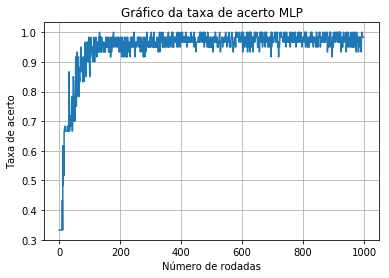

In [14]:
import pandas as pd;
import random;
import math;
import matplotlib.pyplot as plt;
import numpy as np;
%matplotlib inline
arq=pd.read_csv("Iris dataset.dat",sep="\t",header=None,skiprows=0);

qtRodadas=int(input("Digite a quantidade de rodadas\n"));
txAp=float(input("digite a taxa de aprendizado\n"));
qtNCamadaOculta=int(input("digite a quantidade de neuronios na camada oculta\n"));
proptrain=float(input("digite a proporcao do treino\n"));
taxaAcerto=[];

matrizConf=np.array([[0]*3,[0]*3,[0]*3]);
tamTeste=0;
#normalizando
#criando lista com nomes da colunas para poder fazer iteração para normalizar
colunas=arq.columns[:4];

for col in colunas:
    menor=arq[col].min();
    maior=arq[col].max();
    arq[col]=arq[col].apply(lambda x:(x-menor)/(maior-menor));
#fim normalização

arq.insert(loc=0,column="X0",value=-1);

classes={}
#criando o dicionario com as classes em forma de vetor

for x in range(3):
    classes[x+1]=[0]*x+[1]+[0]*(2-x);

#print(arq[4].value_counts())
#separando dataset por classe
cl1=arq.loc[arq[4]==1]
cl2=arq.loc[arq[4]==2]
cl3=arq.loc[arq[4]==3]
#classe para representar neuronios
class Neuronio():
    
    def __init__(self,QPesos):
        #gerando pesos aleatórios
        self.pesos=[random.random() for a in range(QPesos)];
    
#função para calcular o produto escalar    
def ProdutoEscalar(x, w, tam):
    soma=0;
    for a in range(tam):
        soma+=x[a]*w[a];
        
    return soma;

#função para gerar novos pesos
def NovosPesos(pesos,erro,derivada,entrada):
    novospesos=[];
    tam=len(pesos);
    for a in range(tam):
        novospesos.append(pesos[a]+(txAp*erro*(derivada+0.05)*entrada[a]));
                          
    return novospesos;

                          
NeurOcult=[Neuronio(5) for a in range(qtNCamadaOculta)];
NeurSaida=[Neuronio(qtNCamadaOculta+1) for a in range(3)];
#trein=arq.values[1]

#print([a.pesos for a in NeurOcult]);
#print([a.pesos for a in NeurSaida]);
#for para as n rodadas
for rodadas in range(qtRodadas):
    treinamento=((cl1.sample(frac=proptrain)).append(cl2.sample(frac=proptrain))).append(cl3.sample(frac=proptrain));
    teste=((arq.drop(treinamento.index)).sample(frac=1)).values;
    treinamento=(treinamento.sample(frac=1)).values;
    tamTeste=len(teste);
    #print(tamTeste)
    # treinamento
    for trein in treinamento:
        saidaOc=[-1];
        for neuroOc in NeurOcult:
            u=ProdutoEscalar(trein,neuroOc.pesos,5);
            y=1/(1+math.exp(-u));
            saidaOc.append(y);

        saida=[];
        #print(saidaOc)
        for nSaida in NeurSaida:
            a=ProdutoEscalar(saidaOc,nSaida.pesos,qtNCamadaOculta+1);
            o=1/(1+math.exp(-a));
            saida.append(o);

        erroRetro=[0]*qtNCamadaOculta;
        #aprendizado neuronios da camada de saida
        for n in range(3):
            #aprendizado
            indice=(trein[5]);

            errok=classes[indice][n]-saida[n];

            deriv=saida[n]*(1-saida[n]);
            #print(deriv);
            for i in range(qtNCamadaOculta):
                erroRetro[i]+=NeurSaida[n].pesos[i+1]*errok*deriv;

            NeurSaida[n].pesos=NovosPesos(NeurSaida[n].pesos,errok,deriv,saidaOc);
            
        #aprendizado neuronios camada oculta
        for n in range(qtNCamadaOculta):
            deriv=saidaOc[n+1]*(1-saidaOc[n+1]);
            NeurOcult[n].pesos=NovosPesos(NeurOcult[n].pesos,erroRetro[n],deriv,trein);
    #fim fim treinamento
    
    #teste
    acerto=0;
    for test in teste:
        saidaOcT=[-1];
        for neuroOc in NeurOcult:
            u=ProdutoEscalar(test,neuroOc.pesos,5);
            y=1/(1+math.exp(-u));
            saidaOcT.append(y);

        saidaT=[];
        #print(saidaOc)
        for nSaida in NeurSaida:
            a=ProdutoEscalar(saidaOcT,nSaida.pesos,qtNCamadaOculta+1);
            o=1/(1+math.exp(-a));
            saidaT.append(o);
        
        indiceSaida=saidaT.index(max(saidaT));
        indiceDesejado=int(test[5]);
        
        saidaDesejada=classes[indiceDesejado];
        matrizConf[indiceDesejado-1][indiceSaida]+=1;
        if(saidaDesejada[indiceSaida]==1):
            acerto+=1;
        
    taxaAcerto.append(acerto/tamTeste);

print("\n\n")
#print([a.pesos for a in NeurOcult]);
#print([a.pesos for a in NeurSaida]);
plt.figure();
plt.title("Gráfico da taxa de acerto MLP");
plt.grid();
plt.plot(list(range(qtRodadas)),taxaAcerto);

plt.xlabel("Número de rodadas");
plt.ylabel("Taxa de acerto");

plt.show();

[[9.8700e-01 3.0000e-03 1.0000e-02]
 [8.0000e-04 8.8620e-01 1.1300e-01]
 [0.0000e+00 2.9950e-02 9.7005e-01]]


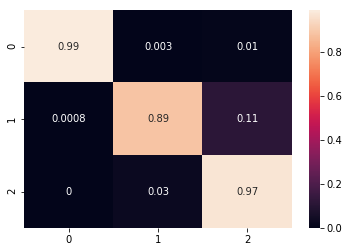

In [15]:
import seaborn as sns
print(matrizConf/(tamTeste/3*qtRodadas))
sns.heatmap((matrizConf/(tamTeste/3*qtRodadas)), annot=True)
plt.show()
